# Curso de Matemáticas para Data Science: Estadística Descriptiva

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy as sp
import pyspark as ps
import seaborn as sns

import sklearn as sk

Haremos uso de los siguinetes datos:

In [2]:
cars = pd.read_csv('C:/Users/eespitia/Documents/VSCode Notebooks/Cursos de Platzi/Datasets/cars.csv')
cars.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


In [3]:
# Vemos las dimensiones del dataset
cars.shape

(38531, 30)

In [4]:
# Vemos las columnas del dataset
cars.columns

Index(['manufacturer_name', 'model_name', 'transmission', 'color',
       'odometer_value', 'year_produced', 'engine_fuel', 'engine_has_gas',
       'engine_type', 'engine_capacity', 'body_type', 'has_warranty', 'state',
       'drivetrain', 'price_usd', 'is_exchangeable', 'location_region',
       'number_of_photos', 'up_counter', 'feature_0', 'feature_1', 'feature_2',
       'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7',
       'feature_8', 'feature_9', 'duration_listed'],
      dtype='object')

In [5]:
# Vemos los tipos de datos de las columnas
cars.dtypes

manufacturer_name     object
model_name            object
transmission          object
color                 object
odometer_value         int64
year_produced          int64
engine_fuel           object
engine_has_gas          bool
engine_type           object
engine_capacity      float64
body_type             object
has_warranty            bool
state                 object
drivetrain            object
price_usd            float64
is_exchangeable         bool
location_region       object
number_of_photos       int64
up_counter             int64
feature_0               bool
feature_1               bool
feature_2               bool
feature_3               bool
feature_4               bool
feature_5               bool
feature_6               bool
feature_7               bool
feature_8               bool
feature_9               bool
duration_listed        int64
dtype: object

In [6]:
# Vemos si contamos con valores faltantes
cars.isna().sum()

manufacturer_name     0
model_name            0
transmission          0
color                 0
odometer_value        0
year_produced         0
engine_fuel           0
engine_has_gas        0
engine_type           0
engine_capacity      10
body_type             0
has_warranty          0
state                 0
drivetrain            0
price_usd             0
is_exchangeable       0
location_region       0
number_of_photos      0
up_counter            0
feature_0             0
feature_1             0
feature_2             0
feature_3             0
feature_4             0
feature_5             0
feature_6             0
feature_7             0
feature_8             0
feature_9             0
duration_listed       0
dtype: int64

In [7]:
# Vemos las principales estadísticas de las variables numéricas
cars.describe()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
count,38531.000000,38531.000000,38521.000000,38531.000000,38531.000000,38531.000000,38531.000000
mean,248864.638447,2002.943734,2.055161,6639.971021,9.649062,16.306091,80.577249
std,136072.376530,8.065731,0.671178,6428.152018,6.093217,43.286933,112.826569
min,0.000000,1942.000000,0.200000,1.000000,1.000000,1.000000,0.000000
25%,158000.000000,1998.000000,1.600000,2100.000000,5.000000,2.000000,23.000000
50%,250000.000000,2003.000000,2.000000,4800.000000,8.000000,5.000000,59.000000
75%,325000.000000,2009.000000,2.300000,8990.000000,12.000000,16.000000,91.000000
max,1000000.000000,2019.000000,8.000000,50000.000000,86.000000,1861.000000,2232.000000


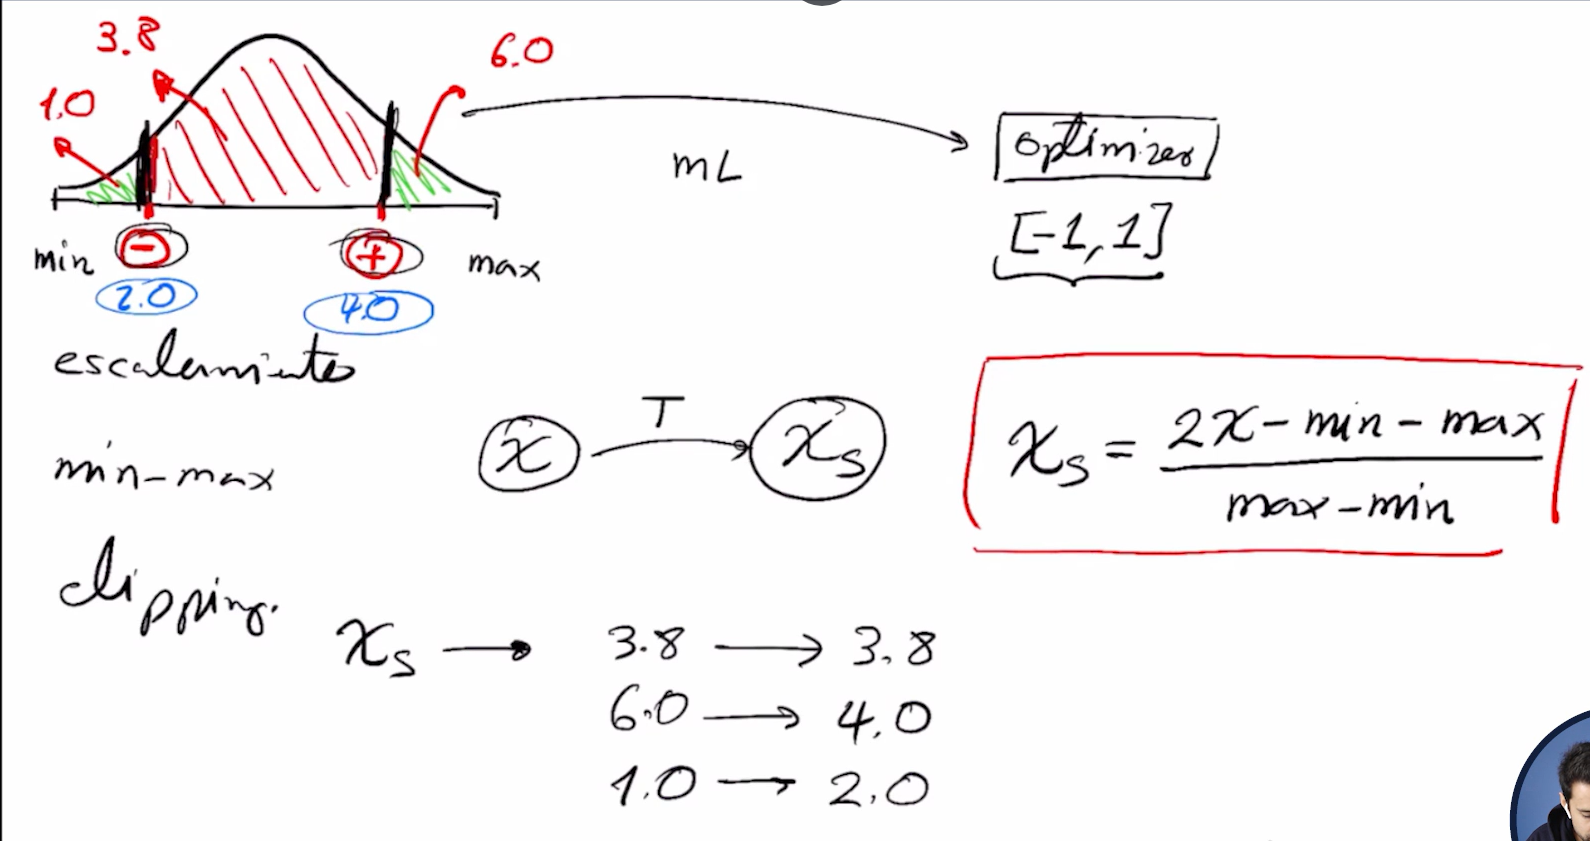

Escalamiento lineal es definir como -1 el mínimo, 1 el máximo y conservar el orden (proporcional) de manera lineal:

$$X_s = \frac{2X-min-max}{max-min}$$  

Clipping es con el un máximo y mínimo arbitrario, mientras que Winzoriding es con los percentiles.

Z-score es estandarizar la normal xd

Para el caso de las Transformaciones no lineales, tenemos:

* $\tanh{x}$
* $\sqrt{x}$
* $\frac{1}{1+\exp(-x)} \hspace{1cm}(\text{Transformación Logística})$

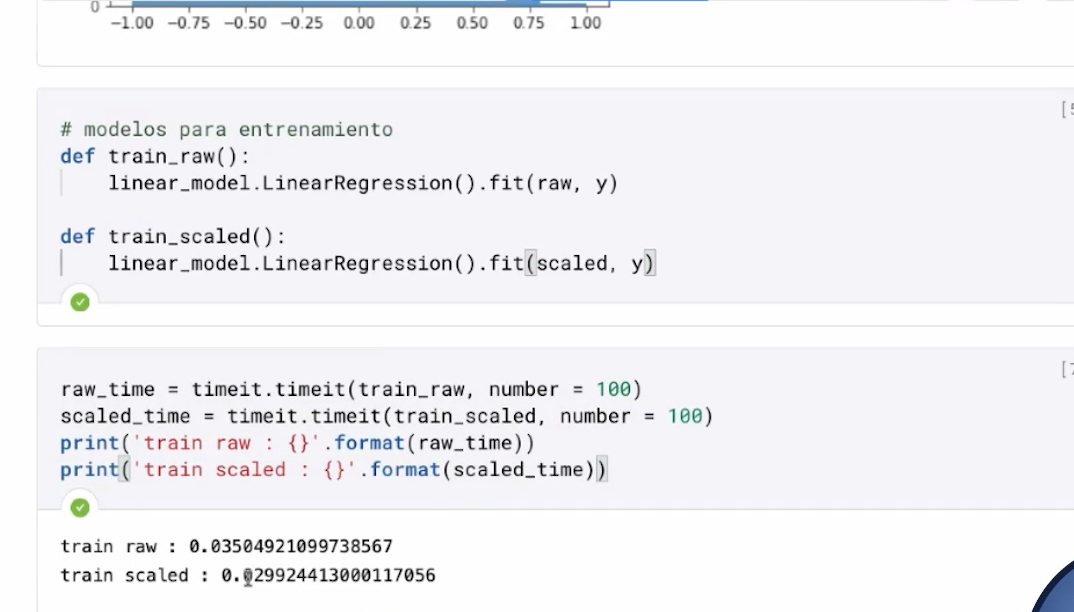

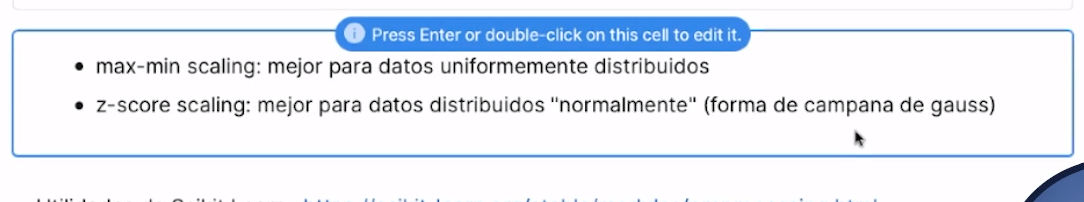

### Pipelines categóricos

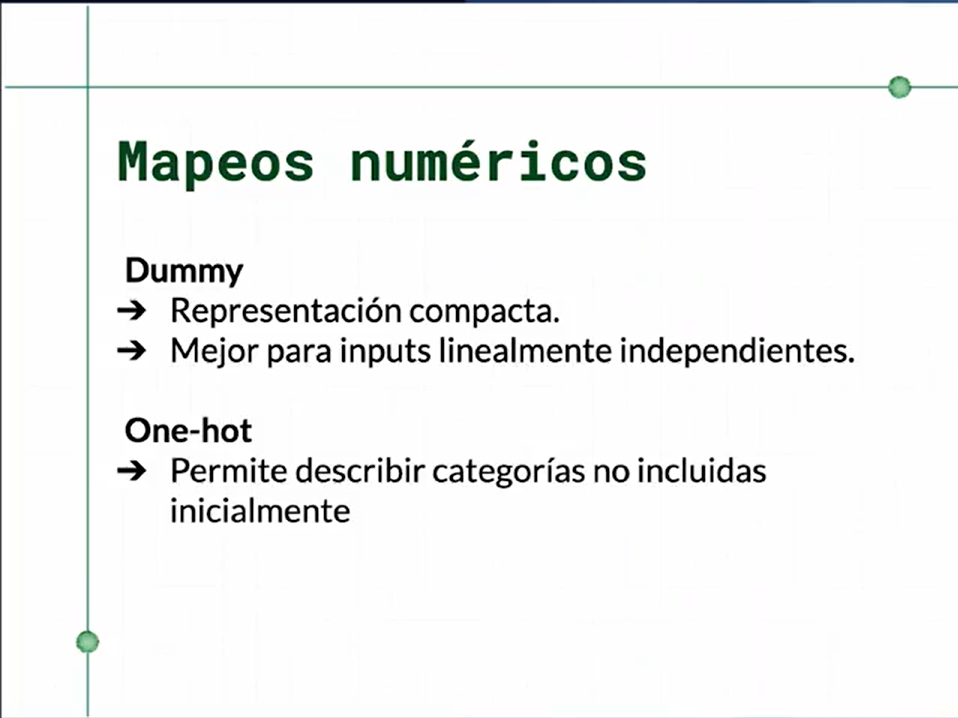

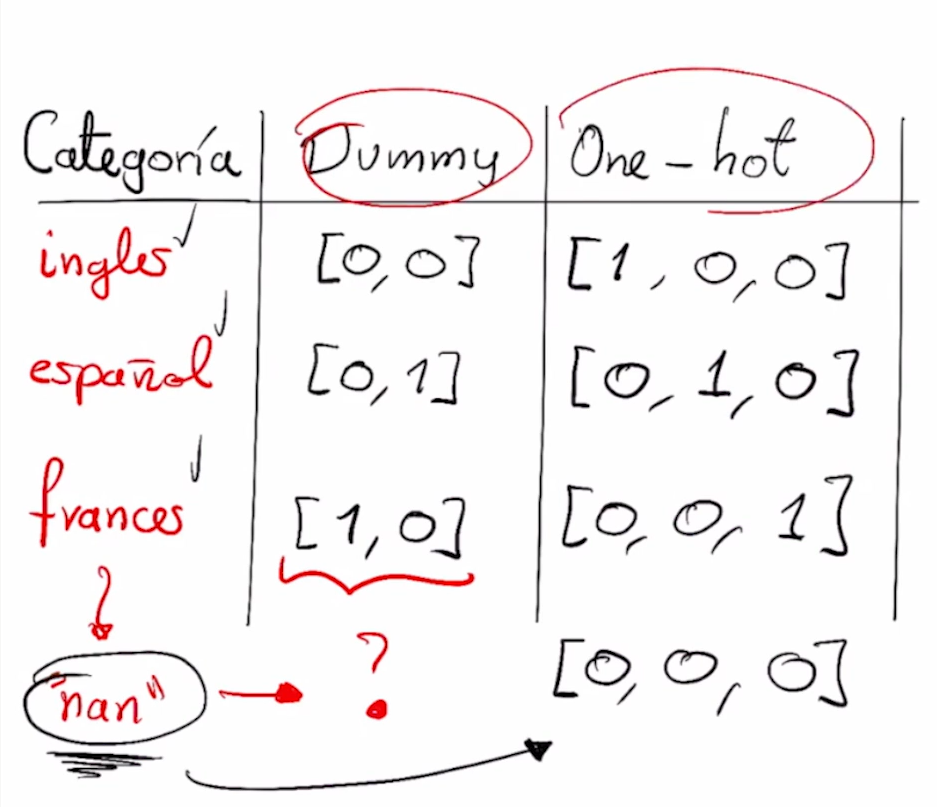

In [8]:
# Variables Dummies con pandas:

pd.get_dummies(cars["engine_type"])

,diesel,electric,gasoline
0,False,False,True
1,False,False,True
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
38526,False,False,True
38527,True,False,False
38528,False,False,True
38529,False,False,True


In [9]:

from sklearn.preprocessing import OneHotEncoder

# Creamos el codificador
encoder = OneHotEncoder(handle_unknown='ignore')
    # El parámetro handle_unknown='ignore' nos permite ignorar los valores desconocidos
    # (Como se muestra en la imagen anterior)
encoder.fit(cars[["engine_type"]].values)   

OneHotEncoder(handle_unknown='ignore')

In [10]:
encoder.transform([["gasoline"],["diesel"],["aceite"]]).toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 0.]])

____PRUEBAS____

In [11]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


C:\Users\eespitia\AppData\Local\Temp\ipykernel_25516\2094170729.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


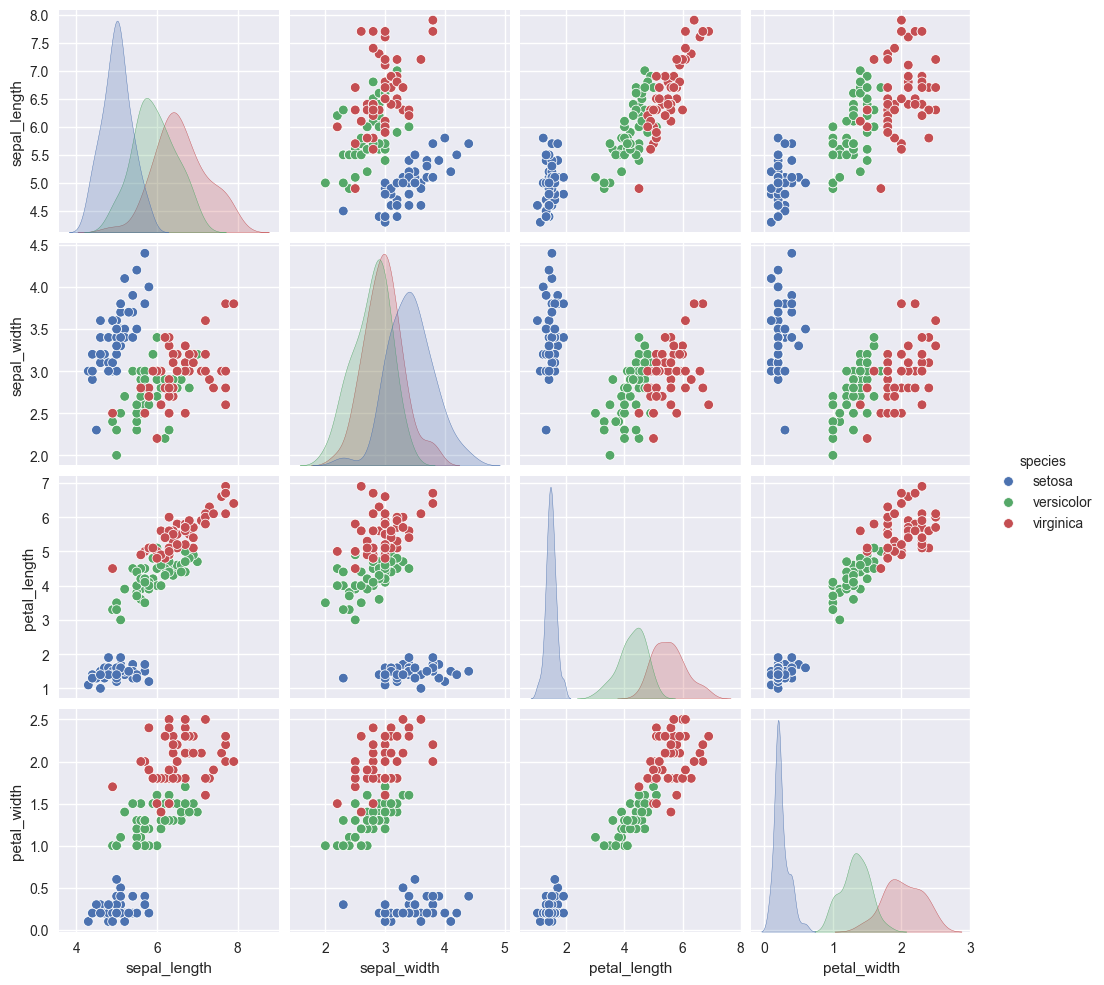

In [43]:
plt.style.use("seaborn")

sns.pairplot(
    data=iris,
    hue="species"
)

plt.show()

In [25]:
iris.drop("species", axis=1).corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


C:\Users\eespitia\AppData\Local\Temp\ipykernel_25516\945965975.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


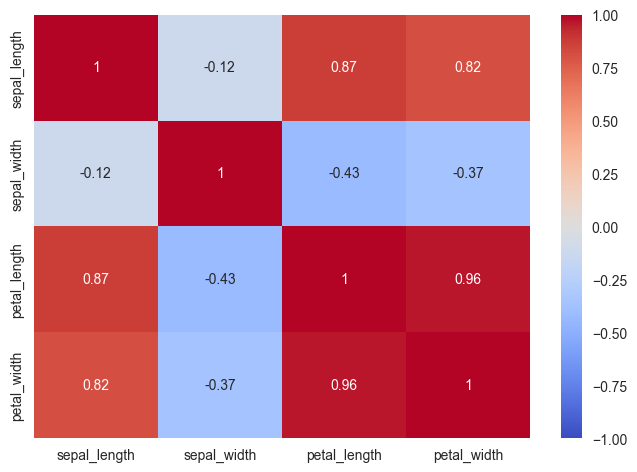

In [41]:
plt.style.use("seaborn")

sns.heatmap(
    iris.drop("species", axis=1).corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    cmap="coolwarm"
)
plt.show()